In [1]:
import pandas as pd
import re

In [2]:
# Download wikipedia dump from https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2
# !wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream.xml.bz2

In [3]:
# Download index file from https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream-index.txt.bz2
# This file is used to find the byte offset of each article in the dump
# !wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream-index.txt.bz2

In [4]:
# Extract wikipedia index file
#!bzip2 -d enwiki-latest-pages-articles-multistream-index.txt.bz2

# Parse wikipedia index file to extract movie indices
# %run -i ../tools/parse_movie_index.py --index_file enwiki-latest-pages-articles-multistream-index.txt --out_file movie_index.txt

In [5]:
# Extract movie articles from wikipedia dump and create a csv file
# %run -i ../tools/process_wiki_dump.py --dump_file enwiki-latest-pages-articles-multistream.xml.bz2 --index_file movie_index.txt --out_file ../download/movies.csv

In [13]:
# read movies database
movie_db = pd.read_csv('data/movies.csv').rename(columns=lambda x: x.strip().replace(" ", ""))


In [14]:
# print sample of movies database
movie_db.head()

,id,title,cast,plot,poster
0,3947,Blue Velvet (film),{{cast listing|<!-- Cast is in credits order ...,<!-- Per WP:FILMPLOT plot summaries for featu...,https://upload.wikimedia.org/wikipedia/en/f/fd...
1,4231,Buffy the Vampire Slayer (film),{{Cast listing|* [[Kristy Swanson]] as [[Buff...,[[Buffy Summers]] is a cheerleader at Hemery H...,https://upload.wikimedia.org/wikipedia/en/0/09...
2,4729,Batman &amp; Robin (film),{{div col}}* [[Arnold Schwarzenegger]] as [[V...,<!-- Per WP:FILMPLOT plot summaries for featu...,https://upload.wikimedia.org/wikipedia/en/3/37...
3,11585,Show Me Love (film),* [[Alexandra Dahlström]] as Elin Olsson* [[R...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...


In [15]:
# print information about movies database
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15795 entries, 0 to 15794
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15795 non-null  int64 
 1   title   15795 non-null  object
 2   cast    15795 non-null  object
 3   plot    15783 non-null  object
 4   poster  15795 non-null  object
dtypes: int64(1), object(4)
memory usage: 617.1+ KB


In [16]:
def clean_column(text):
    """Removes Wikipedia markup, unnecessary tags, and extracts names."""
    if pd.isna(text) or text.lower() == "none":
        return "Unknown"
    
    # Remove Wikipedia templates, comments, and unnecessary symbols
    text = re.sub(r"\{\{.*?\}\}", "", text)  # Remove Wikipedia template tags
    text = re.sub(r"<!--.*?-->", "", text)  # Remove HTML comments
    text = re.sub(r"\[\[(?:[^\]|]*\|)?([^\]]+)\]\]", r"\1", text)  # Extract names from Wikipedia links
    text = re.sub(r"\*", "", text)  # Remove asterisks used for listing
    
    return text.strip()


In [17]:
# movie_db.dropna(inplace=True)

In [18]:
# Remove markup from cast and plot column
movie_db["cast"] = movie_db["cast"].apply(clean_column)
movie_db["plot"] = movie_db["plot"].apply(clean_column)


In [19]:
# Print clean data
movie_db

,id,title,cast,plot,poster
0,3947,Blue Velvet (film),,College student Jeffrey Beaumont returns to hi...,https://upload.wikimedia.org/wikipedia/en/f/fd...
1,4231,Buffy the Vampire Slayer (film),Appearing in uncredited roles are Ben Affleck ...,Buffy Summers is a cheerleader at Hemery High ...,https://upload.wikimedia.org/wikipedia/en/0/09...
2,4729,Batman &amp; Robin (film),Arnold Schwarzenegger as Dr. Victor Fries / Mr...,Batman and his partner Robin encounter a new...,https://upload.wikimedia.org/wikipedia/en/3/37...
3,11585,Show Me Love (film),Alexandra Dahlström as Elin Olsson Rebecka Lil...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...
...,...,...,...,...,...
15790,77243966,Take It to the Limit (film),Jason BortzLeo Fitzpatrick John Marlo Gretel R...,A troubled teenager goes rock climbing.,https://upload.wikimedia.org/wikipedia/en/4/44...
15791,77245209,Firefight (film),Nick MancusoStephen BaldwinSteve Bacic,Bank robbers get involved with a firestorm.,https://upload.wikimedia.org/wikipedia/en/4/44...
15792,77246399,Cloud (film),Masaki Suda as Ryosuke Yoshii an internet res...,Yoshii a young man who resells goods online ...,https://upload.wikimedia.org/wikipedia/en/4/44...
15793,77252576,National Gallery (film),None,The film captures daily activity at the Nation...,https://upload.wikimedia.org/wikipedia/en/c/cc...


In [20]:
# print cast in sample row
print(movie_db["cast"].iloc[1])

Appearing in uncredited roles are Ben Affleck as a basketball player  Ricki Lake as Charlotte  Seth Green as a vampire  and Alexis Arquette as the vampire DJ.


In [21]:
def extract_actors(text):
    """Extract actors from the cast column."""
    if pd.isna(text) or text.lower() == "none" or text.lower() == "unknown":
        return ""
    actors = ", ".join(re.findall(r"\b([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s+as", text))
    if actors == "":
        return text
    else:
        return actors

In [22]:
# Get the actors list
movie_db["actors"] = movie_db["cast"].apply(extract_actors)

In [23]:
movie_db

,id,title,cast,plot,poster,actors
0,3947,Blue Velvet (film),,College student Jeffrey Beaumont returns to hi...,https://upload.wikimedia.org/wikipedia/en/f/fd...,
1,4231,Buffy the Vampire Slayer (film),Appearing in uncredited roles are Ben Affleck ...,Buffy Summers is a cheerleader at Hemery High ...,https://upload.wikimedia.org/wikipedia/en/0/09...,"Ben Affleck, Ricki Lake, Seth Green, Alexis Ar..."
2,4729,Batman &amp; Robin (film),Arnold Schwarzenegger as Dr. Victor Fries / Mr...,Batman and his partner Robin encounter a new...,https://upload.wikimedia.org/wikipedia/en/3/37...,"Arnold Schwarzenegger, George Clooney, Eric Ll..."
3,11585,Show Me Love (film),Alexandra Dahlström as Elin Olsson Rebecka Lil...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...,"Elin Olsson Rebecka Liljeberg, Agnes Ahlberg E..."
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...,
...,...,...,...,...,...,...
15790,77243966,Take It to the Limit (film),Jason BortzLeo Fitzpatrick John Marlo Gretel R...,A troubled teenager goes rock climbing.,https://upload.wikimedia.org/wikipedia/en/4/44...,Jason BortzLeo Fitzpatrick John Marlo Gretel R...
15791,77245209,Firefight (film),Nick MancusoStephen BaldwinSteve Bacic,Bank robbers get involved with a firestorm.,https://upload.wikimedia.org/wikipedia/en/4/44...,Nick MancusoStephen BaldwinSteve Bacic
15792,77246399,Cloud (film),Masaki Suda as Ryosuke Yoshii an internet res...,Yoshii a young man who resells goods online ...,https://upload.wikimedia.org/wikipedia/en/4/44...,"Masaki Suda, Kotone Furukawa, Daiken Okudaira,..."
15793,77252576,National Gallery (film),None,The film captures daily activity at the Nation...,https://upload.wikimedia.org/wikipedia/en/c/cc...,


In [17]:
# Experiment 1: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [18]:
# Step 1: Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',  # Remove common English words (e.g., "the", "a")
    max_df=0.85,           # Ignore terms that appear in >85% of documents
    min_df=1,              # Include terms that appear in at least 1 document
)

In [25]:
# Step 2: Transform movie plots into TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_db['plot'])

In [26]:
# Step 3: Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
# Step 4: Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim, movies=movie_db):
    # Get the index of the movie that matches the title
    idx = movie_db.index[movie_db['title'].str.contains(rf"\b{title}\b")].to_list()[0]
    
    # Get similarity scores for all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores (descending order)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 3 most similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:6]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of recommended movies
    return movie_db['title'].iloc[movie_indices]

In [28]:
# Test the recommendation system
movie_title = 'Titanic'
recommendations = get_recommendations(movie_title)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

Recommendations for 'Titanic':
6408                   Titanic II (film)
15682                  Unsinkable (film)
1276                     Six Pack (film)
4080              Streets of Gold (film)
8435     The Shield and the Sword (film)
Name: title, dtype: object


In [30]:
# Experiment 2: Doc2Vec Embedding
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess

# Step 1: Tokenize movie plots
tagged_documents = [
    TaggedDocument(
        words=simple_preprocess(plot),  # Tokenize and preprocess (lowercase, remove punctuation)
        tags=[str(i)]                   # Unique tag for each document (e.g., '0', '1', ...)
    )
    for i, plot in enumerate(movie_db["plot"])
]
# Step 2: Train Doc2Vec model
max_epochs = 10
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_documents)

for epoch in range(max_epochs):
    model.train(tagged_documents,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha


In [31]:
# Step 3: Save the model to disk
model.save("models/doc2vec_movie_model")
print("Model saved to 'doc2vec_movie_model'")

Model saved to 'doc2vec_movie_model'


In [125]:
# Load the model from disk for future use
from gensim.models.doc2vec import Doc2Vec
from nltk.tokenize import word_tokenize
import nltk
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
nltk.download('punkt')

model = Doc2Vec.load("models/doc2vec_movie_model")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahadevgaonkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [126]:
# Step 4: Function to get recommendations
def get_recommendations_doc2vec(title, model, movies=movie_db, top_n=5):
    # Get the index of the movie that matches the title
    print("matching title", title)
    idx = movie_db[movie_db['title'].str.contains(rf"\b{title}\b", case=False, na=False, regex=True)].index[0]
    print("idx", idx)
    
    plot_text = movie_db['plot'].iloc[idx].lower()
    print("title = ", movie_db.iloc[idx]['title'])
    print("plot = ", plot_text)
    
    tokenized_text = simple_preprocess(plot_text)
    text_vector = model.infer_vector(tokenized_text)
    
    # Compute cosine similarity
    similar_movies = cosine_similarity([text_vector], model.dv.vectors)

    # Get top similar documents
    similar_doc_indices = np.argsort(similar_movies[0])[::-1][:top_n]
    print("similar_doc_indices", similar_doc_indices)
        
    # Return the titles of recommended movies
    return movie_db['title'].iloc[similar_doc_indices]


In [138]:
# Test the recommendation system
movie_title = 'Aliens'
recommendations = get_recommendations_doc2vec(movie_title, model, movie_db, 5)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

matching title Aliens
idx 200
title =  Aliens (film)
plot =  ellen ripley has been in stasis for 57 years aboard an escape shuttle after destroying her ship  the ''nostromo''  to escape an alien creature that slaughtered the rest of the crew. she is rescued and debriefed by her employers at the weyland-yutani corporation  who are skeptical about her claim of alien eggs in a derelict ship on the exomoon lv-426  since it is now the site of a terraforming colony.after contact is lost with the colony  weyland-yutani representative carter burke and colonial marine lieutenant gorman ask ripley to accompany them to investigate. still traumatized by her alien encounter  she agrees on the condition that they exterminate the creatures. ripley is introduced to the colonial marines on the spaceship ''sulaco'' but is distrustful of their android  bishop  because the android aboard the ''nostromo'' betrayed its crew to protect the alien on company orders.a dropship delivers the expedition to the sur

In [134]:
def get_recommendations_doc2vec_from_plot(plot_text, model, movies=movie_db, top_n=5):    
    tokenized_text = simple_preprocess(plot_text)
    text_vector = model.infer_vector(tokenized_text)
    
    # Compute cosine similarity
    similar_movies = cosine_similarity([text_vector], model.dv.vectors)

    # Get top similar documents
    similar_doc_indices = np.argsort(similar_movies[0])[::-1][:top_n]
    print("similar_doc_indices", similar_doc_indices)
        
    # Return the titles of recommended movies
    return movie_db['title'].iloc[similar_doc_indices]

In [135]:
# Test the recommendation system - plot text
from gensim.utils import simple_preprocess

plot_text = "I like movies with mind-bending plots and futuristic themes."
recommendations = get_recommendations_doc2vec_from_plot(plot_text, model, movie_db, 10)
print(f"Recommendations:")
print(recommendations)

similar_doc_indices [ 5993 13403 13792 15746 15208  1121 13380  5878 15550 15734]
Recommendations:
5993              Red Velvet (film)
13403           High Fashion (film)
13792         The Ringmaster (film)
15746                 I Need (film)
15208                   Saho (film)
1121              White Skin (film)
13380                  Artik (film)
5878                   Lalon (film)
15550    DraftVeni Vidi Vici (film)
15734          DraftBabygirl (film)
Name: title, dtype: object


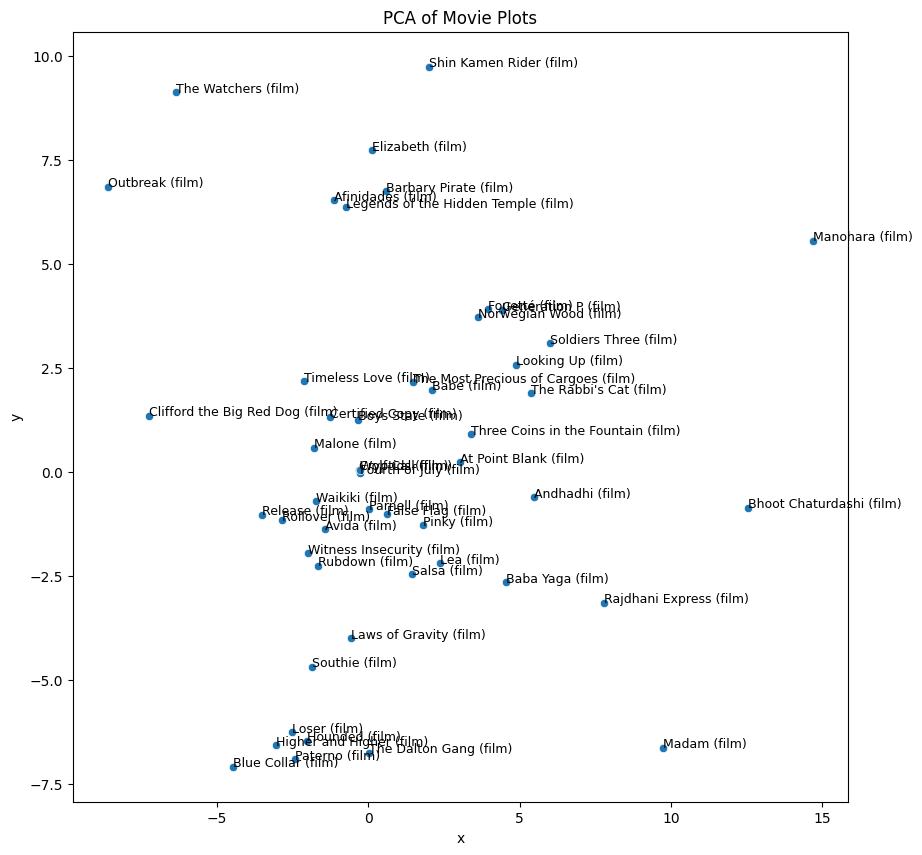

In [136]:
# Principle Component Analysis for visualiazation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 1: Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(model.dv.vectors)

# Step 2: Create a DataFrame for visualization
df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
df['title'] = movie_db['title']

# Step 3: Plot random 50 movie data points
df_sample = df.sample(50, random_state=42)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_sample, x='x', y='y')

for i in df_sample.index:
    plt.text(df['x'][i], df['y'][i], df['title'][i], fontsize=9)
plt.title('PCA of Movie Plots')
plt.show()

In [115]:
# Experiment 2A: Large language model (LLM) embeddings - BERT
# Step 1: Load pre-trained BERT model

from transformers import BertTokenizer, BertModel
from transformers import DistilBertTokenizer, DistilBertModel
import torch

MODEL_NAME = 'distilbert-base-uncased'

# Load pre-trained model tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
model = DistilBertModel.from_pretrained(MODEL_NAME)

# Function to get BERT embeddings   
def get_embedding_bert(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the [CLS] token embedding (first token) as the sentence representation
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [120]:
# Step 2 : Get BERT embeddings for movie plots
import faiss
import os
from tqdm.notebook import tqdm
import numpy as np

tqdm.pandas()
if os.path.exists('data/faiss_movie_index.distilbert'):
    index = faiss.read_index('data/faiss_movie_index.distilbert')
    print("Embeddings index loaded.")
else:
    print("Generating embeddings for all movies...")
    movie_db['embedding'] = movie_db['plot'].progress_apply(get_embedding_bert)
    print("Embeddings generated for all movies.")

    print("Building index for embeddings...")
    embeddings = np.stack(movie_db['embedding'].values).astype('float32')  # FAISS expects float32
    index = faiss.IndexFlatL2(embeddings.shape[1])  # 768 is the dimension of BERT embeddings
    index.add(embeddings)
    print("Index built.")
    faiss.write_index(index, "data/faiss_movie_index.distilbert")
    print("Embeddings index saved.")

Generating embeddings for all movies...


  0%|          | 0/15795 [00:00<?, ?it/s]

Embeddings generated for all movies.
Building index for embeddings...
Index built.
Embeddings index saved.


In [119]:
# Step 3: Get recommendation
user_embedding = get_embedding_bert("I like movies with mind-bending plots and futuristic themes.")
distances, indices = index.search(np.array([user_embedding]).astype('float32'), k=10)
print(movie_db.iloc[indices[0]][['title', 'plot']])

                             title  \
12101        Massacre River (film)   
11100              Outbound (film)   
15499   Misery Loves Comedy (film)   
11822              Sawbones (film)   
3980        Knave of Hearts (film)   
11963          Mapplethorpe (film)   
2745   Nothing Else Matters (film)   
2106                Entropy (film)   
8395                 Acteón (film)   
12159     Woke Up Like This (film)   

                                                    plot  
12101  This film is a tragic love story disguised as ...  
11100  A drama about a woman who seems able to overco...  
15499               A look into the dark side of comedy.  
11822  An edgy  terrifying tale about an intern who f...  
3980   The film portrays the adventures of a French p...  
11963  The film depicts the life of Robert Mapplethor...  
2745   A comedy/drama genre film  about the life of a...  
2106   A largely autobiographical film about director...  
8395   The film narrates the unusual relationship 

In [110]:
# Get similar movies given a movie title
def get_recommendations_llm(title, model, movies=movie_db, top_n=5):
    # Get the index of the movie that matches the title
    print("matching title", title)
    idx = movie_db[movie_db['title'].str.contains(rf"\b{title}\b", case=False, na=False, regex=True)].index[0]
    print("idx", idx)
    
    plot_text = movie_db['plot'].iloc[idx].lower()
    print("title = ", movie_db.iloc[idx]['title'])
    print("plot = ", plot_text)
    
    user_embedding = get_embedding_bert(plot_text)
    distances, indices = index.search(np.array([user_embedding]).astype('float32'), k=top_n)
        
    # Return the titles of recommended movies
    return movie_db.iloc[indices[0]][['title']]

In [111]:
# Test the BERT based recommendation system
movie_title = 'Titanic'
recommendations = get_recommendations_llm(movie_title, model, movie_db, 10)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

matching title Titanic
idx 5579
title =  Raise the Titanic (film)
plot =  in the wilds of northern siberia during the cold war  an american spy breaks into an old  snow-covered mine  where he discovers the frozen body of a u.s. army sergeant next to a wooden marker dated 10 february  1912. using a geiger counter  the spy discovers that byzanium  a highly radioactive element that could be used in nuclear warfare  was mined there. the spy is quickly discovered and chased out of the mine by a soviet soldier  who shoots him in pursuit. the soviet soldier is then shot and killed by dirk pitt  who rescues the spy and takes him back to washington  d.c.the c.i.a. discovers that the mine was operated by americans and that the raw byzanium ore found there was to be sent back to the united states. the byzanium was packaged into wooden shipping boxes by an american named brewster and loaded onboard the ''titanic''  which sank on its maiden voyage on 15 april 1912. pitt travels to speak with a deck

In [59]:
# Experiment 2B: Sentence Transformers
from sentence_transformers import SentenceTransformer

device = torch.device("mps" if torch.mps.is_available() else "cpu")
print(f"Using device: {device}")
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device=device)
embeddings = model.encode(movie_db['plot'].tolist(), convert_to_tensor=True, show_progress_bar=True)
movie_db['embedding'] = [emb.cpu().numpy() for emb in embeddings] 

Using device: mps


Batches:   0%|          | 0/494 [00:00<?, ?it/s]

In [60]:
# Save the index and metadata
embeddings_np = np.stack(movie_db['embedding']).astype('float32')
dimension = embeddings_np.shape[1]  # 768
index = faiss.IndexFlatL2(dimension)
index.add(embeddings_np)
faiss.write_index(index, 'faiss_movie_index.all-mpnet-base-v2')
print("Index and metadata saved.")

Index and metadata saved.


In [103]:
# Test the sentence transformer recommendation system
user_query = "I like movies with mind-bending plots and futuristic themes."
user_embedding = model.encode(user_query, convert_to_tensor=True).cpu().numpy().astype('float32')

# Search FAISS
k = 10
distances, indices = index.search(np.array([user_embedding]), k)
top_movies = movie_db.iloc[indices[0]].copy()
top_movies['distance'] = distances[0]
print("Top Recommendations:")
print(top_movies[['title', 'plot', 'distance']])

Top Recommendations:
                                             title  \
13344                                Crumbs (film)   
1390                                   Eros (film)   
5864                                     2B (film)   
14855  Tonite Let's All Make Love in London (film)   
3588                               Aversion (film)   
12182                           Nightflyers (film)   
14682                                 Photo (film)   
11571                         Save Yourself (film)   
15188                                711 PM (film)   
4180                     Beyond the Horizon (film)   

                                                    plot  distance  
13344  In a dazzlingly imaginative vision of a postap...  1.155251  
1390   ;''The Hand''Miss Hua  a 1960s high-end call g...  1.182178  
5864   Set in the near future  ''2B'' portrays a fami...  1.259184  
14855  The film self-describes as a “Pop Concerto for...  1.266001  
3588   This original story marries thre

In [77]:
# Experiment 2B using Milvus vector database
from pymilvus import MilvusClient, DataType

client = MilvusClient("data/movie_recommendations.db")
schema = MilvusClient.create_schema(
    auto_id=False,
    enable_dynamic_field=False,
)
schema.add_field(field_name="id", datatype=DataType.INT64, is_primary=True, auto_id=True)
schema.add_field(field_name="title", datatype=DataType.VARCHAR, max_length=256)
schema.add_field(field_name="plot", datatype=DataType.VARCHAR, max_length=4096)
schema.add_field(field_name="embedding", datatype=DataType.FLOAT_VECTOR, dim=768)

if client.has_collection("movies"):
    client.drop_collection("movies")
    
client.create_collection(collection_name="movies", schema=schema)

In [82]:
# Create data to insert in vector database
data_to_insert = [
    {
        "title": row["title"],
        "plot": row["plot"],
        "embedding": row["embedding"].tolist()  # Convert NumPy array to list
    }
    for _, row in movie_db.iterrows()
]

In [83]:
for i in tqdm(range(0, len(data_to_insert)), desc="Inserting into Milvus"):
    client.insert(collection_name="movies", data=data_to_insert[i:i+1])

Inserting into Milvus:   0%|          | 0/15795 [00:00<?, ?it/s]

In [94]:
# Create index for faster search (HNSW is a good default)
index_params = [
    {
        "field_name": "embedding",  # Specify the field explicitly
        "index_type": "IVF_FLAT",  # Options: IVF_FLAT, IVF_PQ, HNSW, etc.
        "metric_type": "L2",  # L2 = Euclidean Distance
        "params": {"nlist": 128}  # Adjust based on dataset size
    }
]
client.create_index(collection_name="movies", index_params=index_params)

In [95]:
client.load_collection("movies")

In [96]:
# User query
user_query = "I like movies with mind-bending plots and futuristic themes."
user_embedding = model.encode(user_query, convert_to_tensor=False)  # NumPy array

In [101]:
# Search Milvus
search_params = {"metric_type": "L2", "params": {"ef": 64}}
results = client.search(
    collection_name="movies",
    data=[user_embedding.tolist()],  # List of query vectors
    limit=10,
    output_fields=["title", "plot"],
    search_params=search_params
)

In [102]:
# Display results
print("Top Recommendations:")
for result in results[0]:  # First query's results
    print(f"Title: {result['entity']['title']}")
    print(f"Description: {result['entity']['plot']}")
    print(f"Distance: {result['distance']:.4f}\n")

Top Recommendations:
Title: Crumbs (film)
Description: In a dazzlingly imaginative vision of a postapocalyptic Ethiopia  a hapless scavenger finds himself launched on a surreal adventure involving a mysterious UFO  witches  Santa Claus  Nazi knights  and more. Conjuring a loop-the-loop universe from the detritus of late-twentieth-century pop culture (from Michael Jordan to Ninja Turtles)  this psychedelic fantasia surprises and charms as it spins off its own giddy axis.==See also==List of Afrofuturist films
Distance: 1.1553

Title: Eros (film)
Description: ;''The Hand''Miss Hua  a 1960s high-end call girl is visited by a shy dressmaker's assistant Zhang  to take her measure. He hears the sounds of sex  as he waits in her living room. He is drawn towards her but there is no meeting ground between the two individuals from completely different classes. She summons him when her client leaves. She tells him  she will supply him with an aid to his memory. He will think about her while design